In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from sklearn.model_selection import train_test_split

In [7]:
# Load the dataset
train_df = pd.read_csv('C:/Users/nesil.bor/Desktop/Folders/master/DI725/DI725-transformer-sentiment-analysis/data/raw/train.csv')
test_df = pd.read_csv('C:/Users/nesil.bor/Desktop/Folders/master/DI725/DI725-transformer-sentiment-analysis/data/raw/test.csv')

# Display basic information
print(f"Train set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

# Display column names
print("Columns in the dataset:")
print(train_df.columns.tolist())

Train set shape: (970, 11)
Test set shape: (30, 11)
Columns in the dataset:
['issue_area', 'issue_category', 'issue_sub_category', 'issue_category_sub_category', 'customer_sentiment', 'product_category', 'product_sub_category', 'issue_complexity', 'agent_experience_level', 'agent_experience_level_desc', 'conversation']


In [8]:
# Check for missing values
print("\nMissing values in train set:")
print(train_df.isnull().sum())

# Display basic statistics
print("\nBasic statistics of train set:")
print(train_df.describe(include='all'))



Missing values in train set:
issue_area                     0
issue_category                 0
issue_sub_category             0
issue_category_sub_category    0
customer_sentiment             0
product_category               0
product_sub_category           0
issue_complexity               0
agent_experience_level         0
agent_experience_level_desc    0
conversation                   0
dtype: int64

Basic statistics of train set:
                       issue_area       issue_category  \
count                         970                  970   
unique                          6                   40   
top     Cancellations and returns  Return and Exchange   
freq                          277                   92   

                                       issue_sub_category  \
count                                                 970   
unique                                                109   
top     Verification requirement for mobile number or ...   
freq                       

In [11]:
# Display first few rows of the dataset
print(train_df.head())

# Display column names
print("\nColumn names:")
print(train_df.columns.tolist())

                  issue_area                        issue_category  \
0          Login and Account  Mobile Number and Email Verification   
1  Cancellations and returns                   Pickup and Shipping   
2  Cancellations and returns        Replacement and Return Process   
3          Login and Account       Login Issues and Error Messages   
4                      Order                 Order Delivery Issues   

                                  issue_sub_category  \
0  Verification requirement for mobile number or ...   
1           Reasons for being asked to ship the item   
2             Inability to click the 'Cancel' button   
3  Error message regarding exceeded attempts to e...   
4                       Delivery not attempted again   

                         issue_category_sub_category customer_sentiment  \
0  Mobile Number and Email Verification -> Verifi...            neutral   
1  Pickup and Shipping -> Reasons for being asked...            neutral   
2  Replacement an

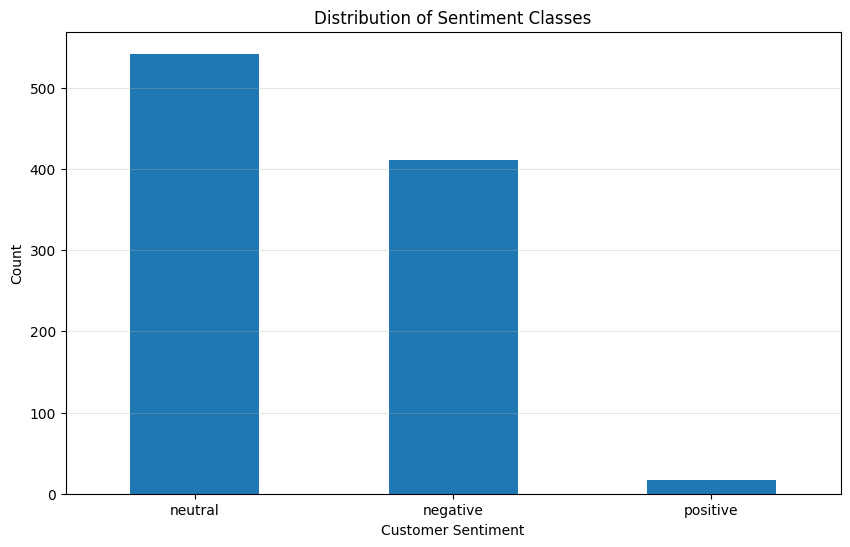


Sentiment distribution percentage:
customer_sentiment
neutral     55.876289
negative    42.371134
positive     1.752577
Name: count, dtype: float64


In [12]:
# Analyze sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts = train_df['customer_sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Customer Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Calculate sentiment distribution percentage
print("\nSentiment distribution percentage:")
sentiment_percentage = sentiment_counts / len(train_df) * 100
print(sentiment_percentage)

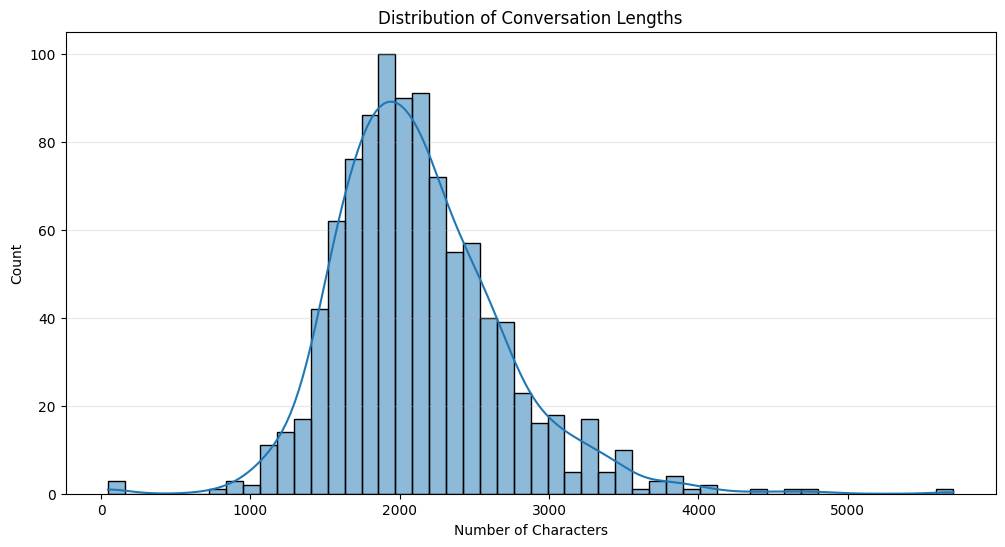

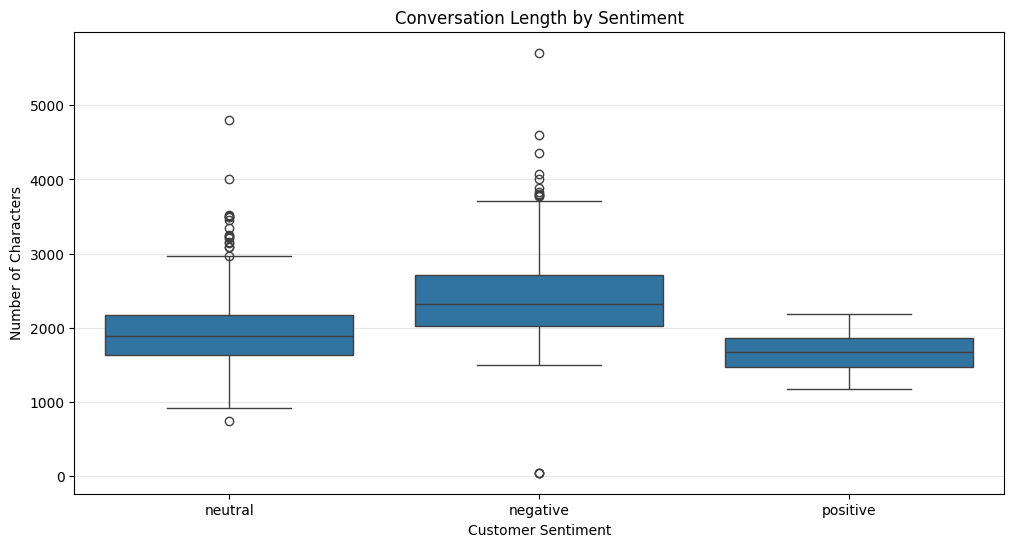

In [13]:
# Analyze text length in conversations
train_df['conversation_length'] = train_df['conversation'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(train_df['conversation_length'], bins=50, kde=True)
plt.title('Distribution of Conversation Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Analyze conversation lengths by sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_sentiment', y='conversation_length', data=train_df)
plt.title('Conversation Length by Sentiment')
plt.xlabel('Customer Sentiment')
plt.ylabel('Number of Characters')
plt.grid(axis='y', alpha=0.3)
plt.show()

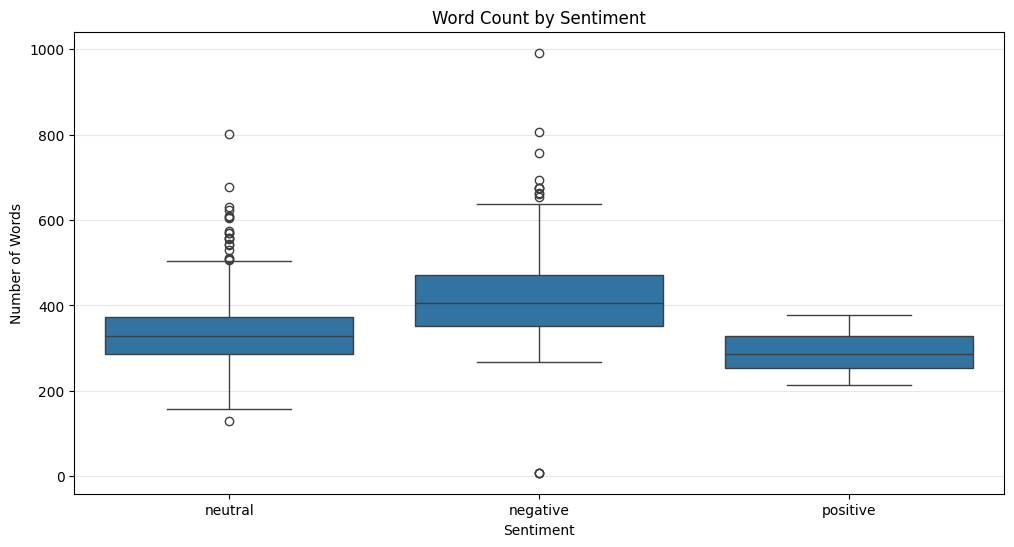

In [14]:
# Word count analysis
train_df['word_count'] = train_df['conversation'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_sentiment', y='word_count', data=train_df)
plt.title('Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Check for any correlations between features
# This will depend on what other features are available in the dataset

# Save this commit
# git add notebooks/01_exploratory_data_analysis.ipynb
# git commit -m "Add exploratory data analysis notebook"
# git push origin main

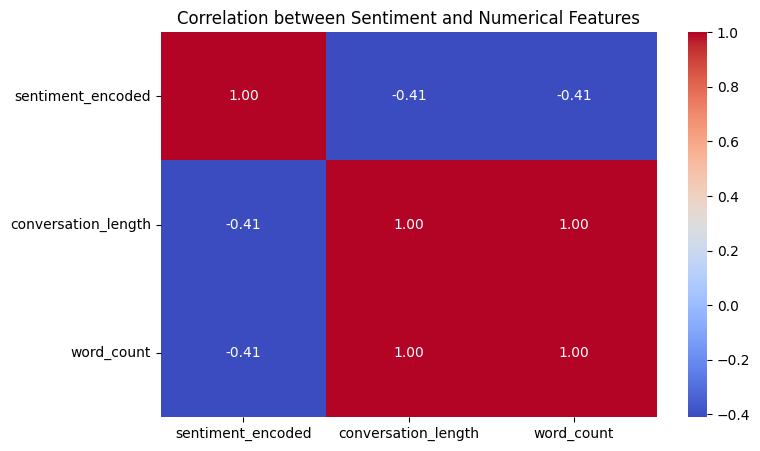

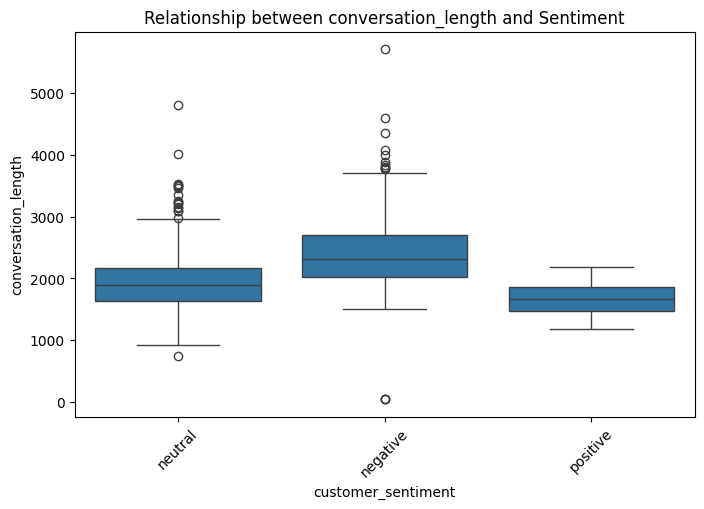

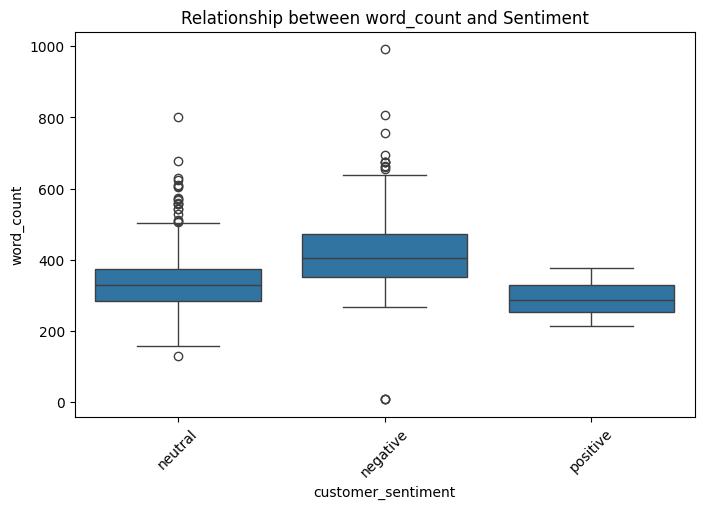

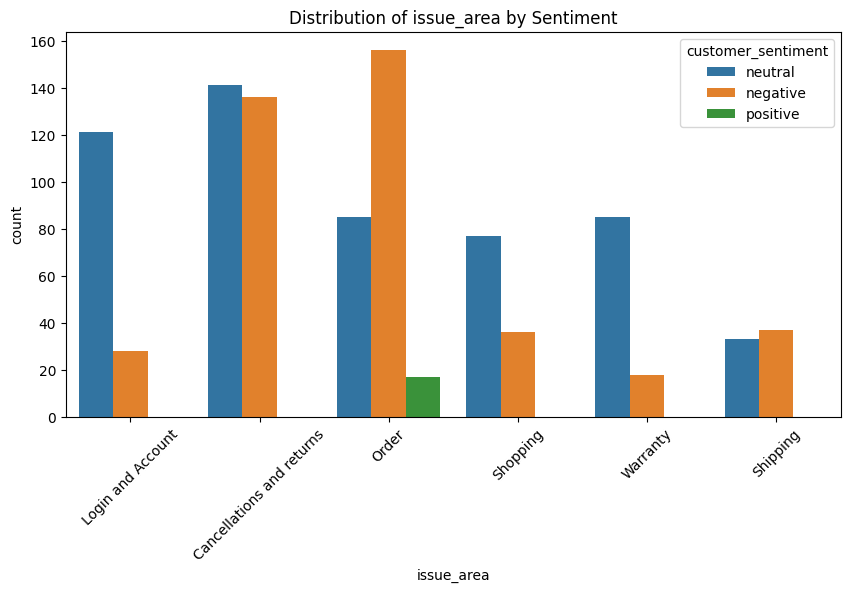

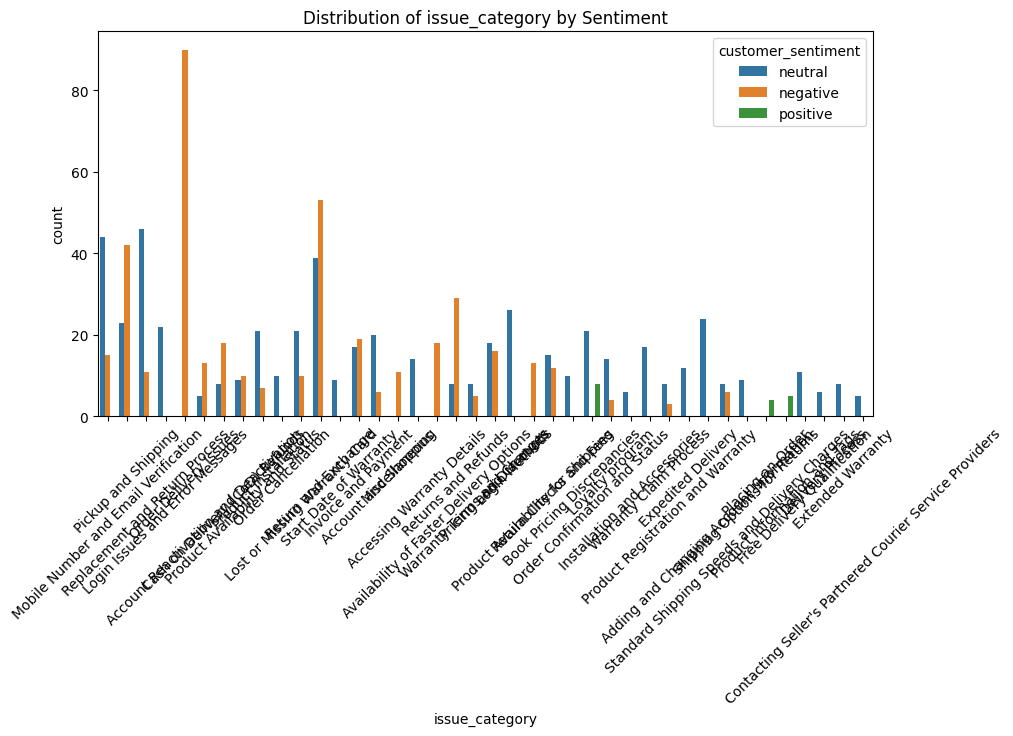

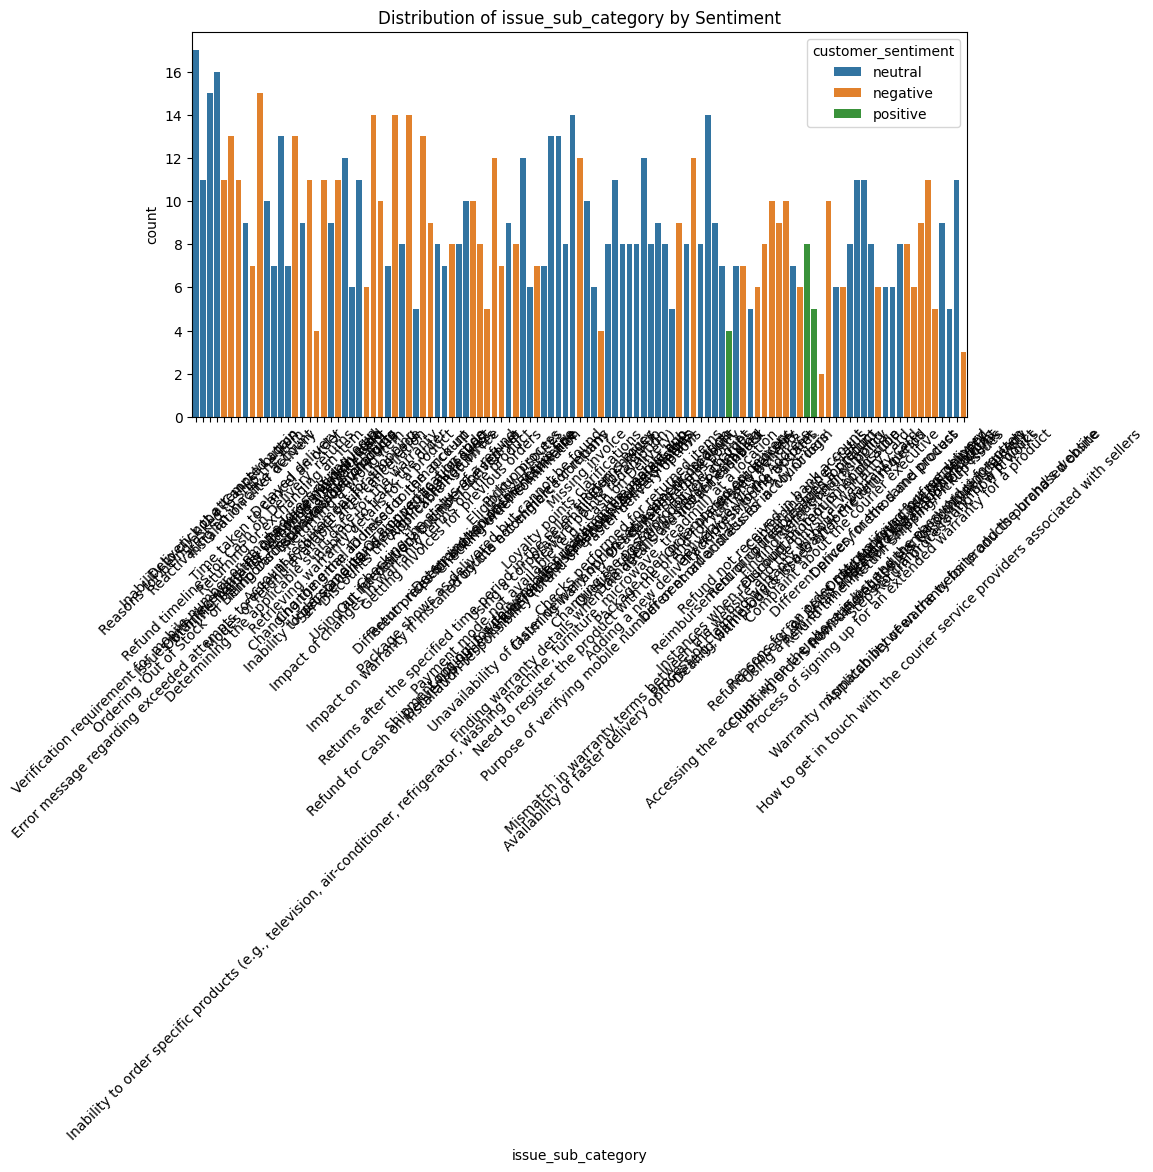

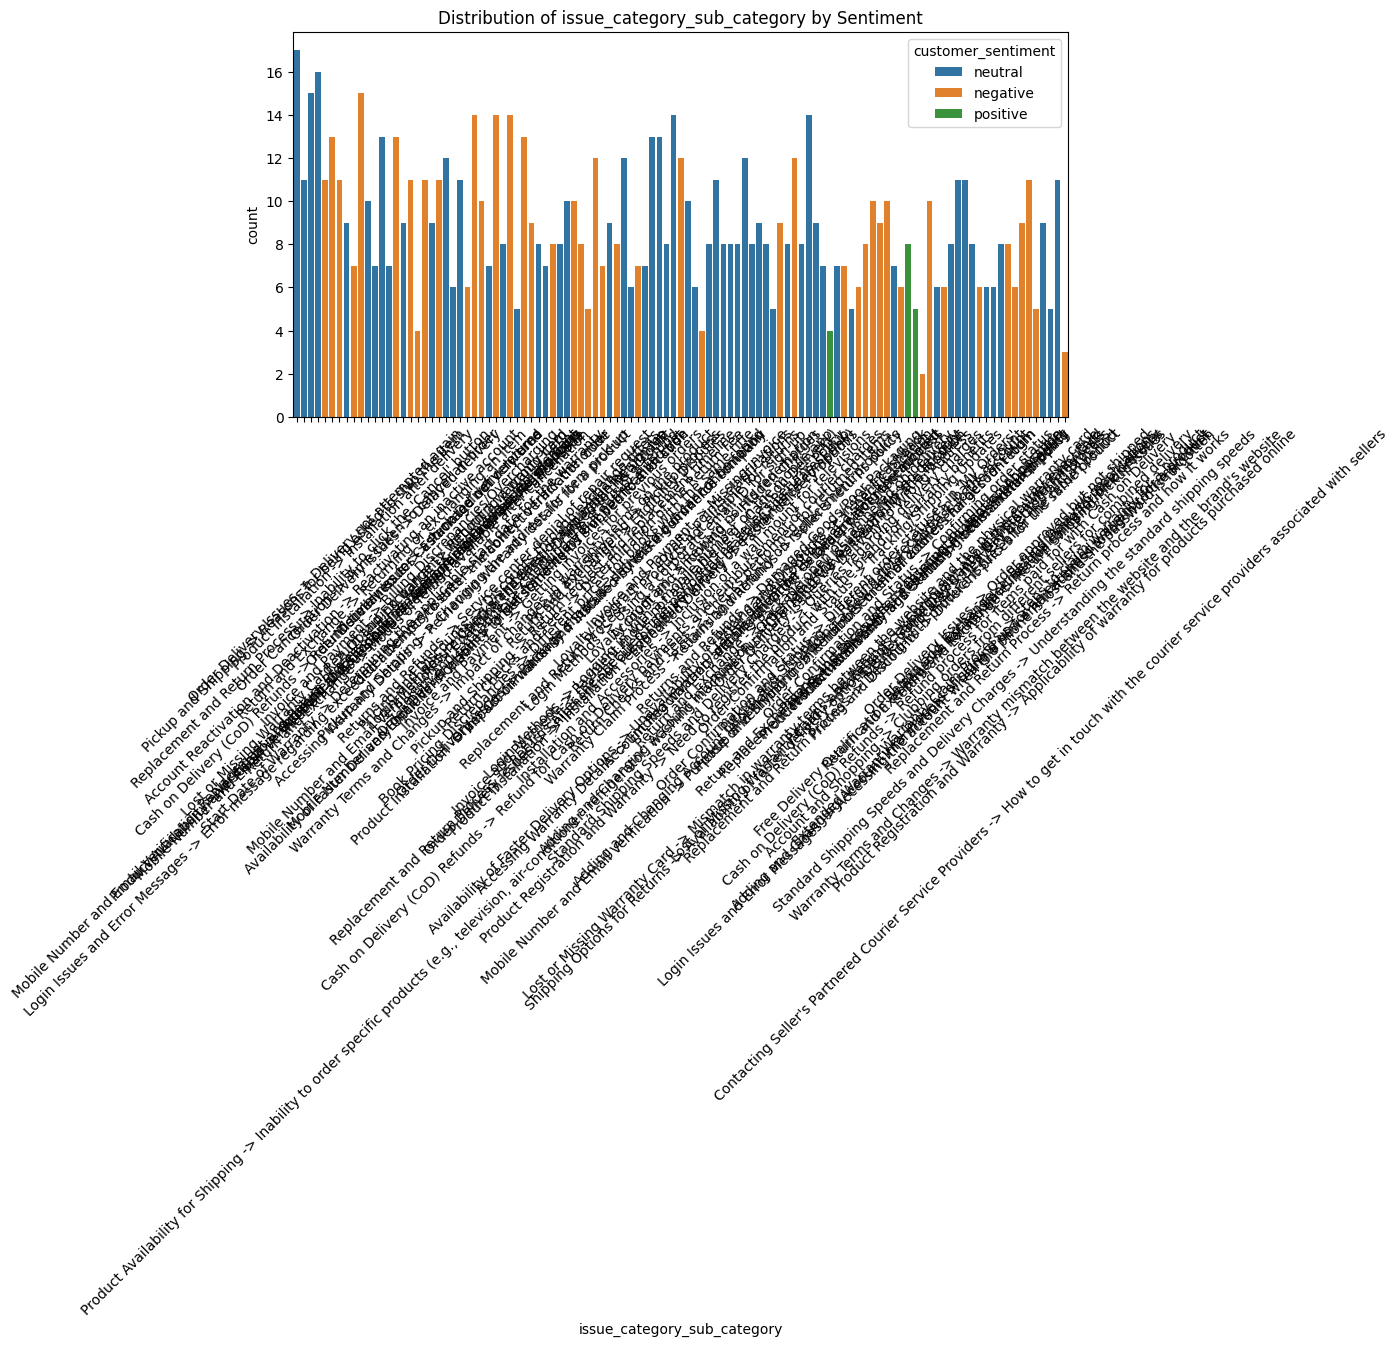

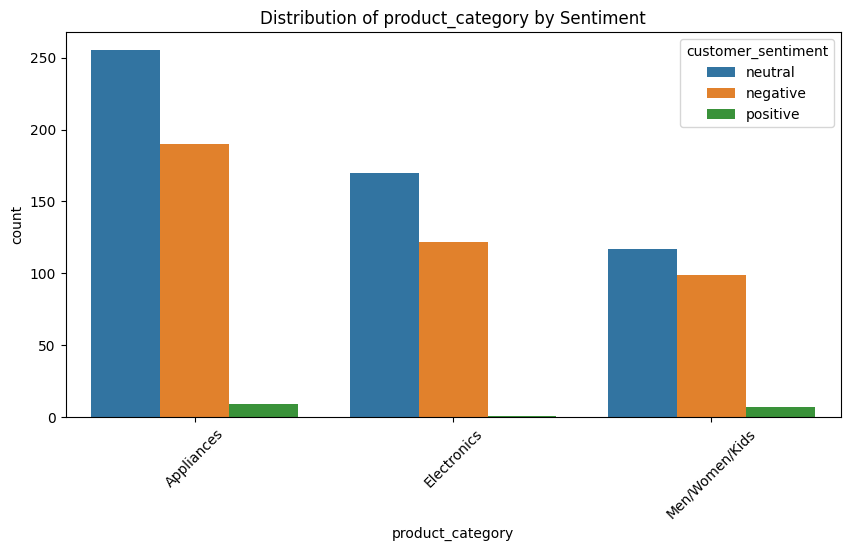

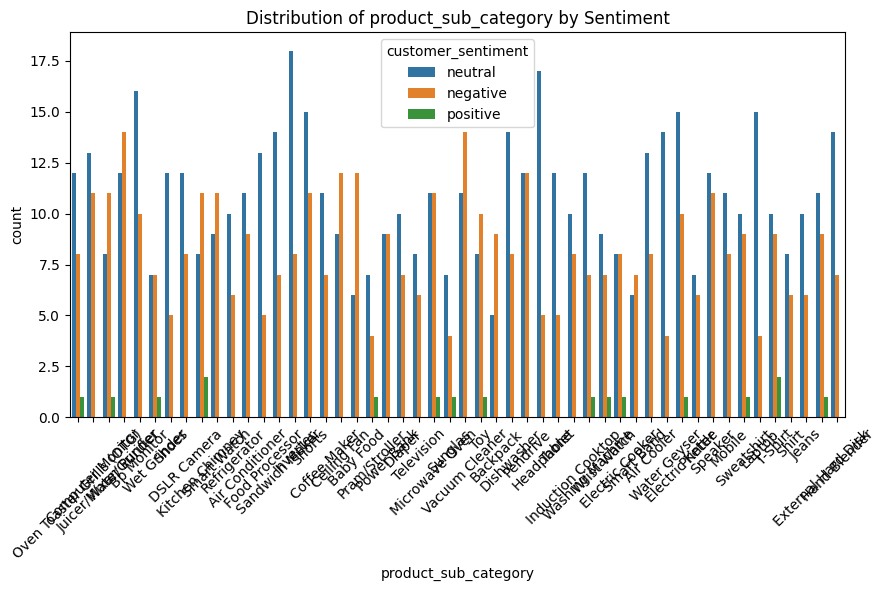

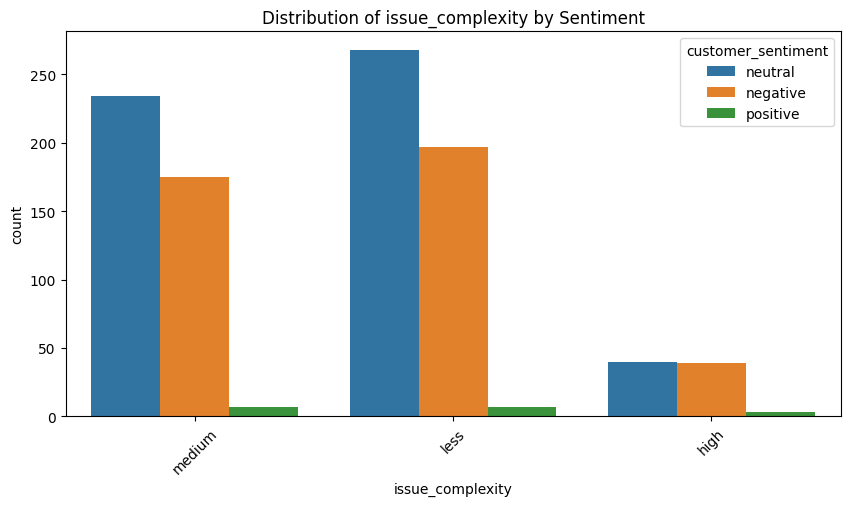

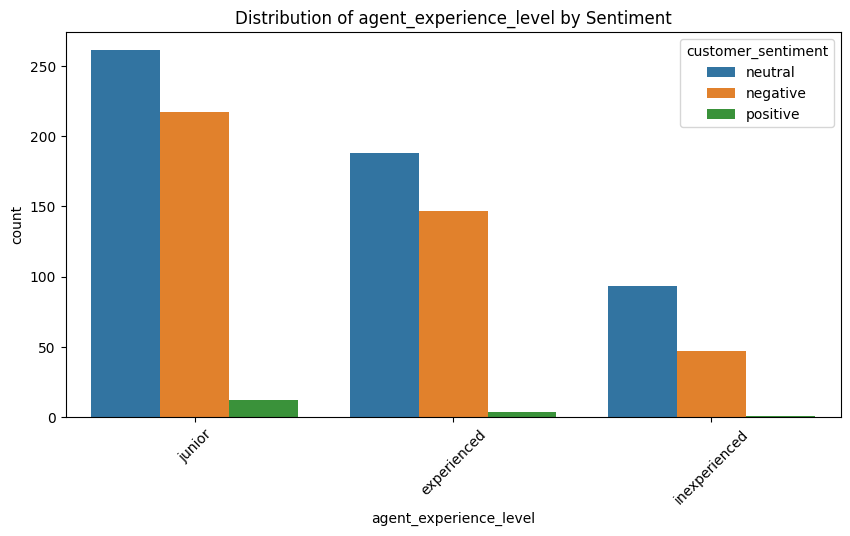

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Encode Sentiment as Numeric
train_df['sentiment_encoded'] = train_df['customer_sentiment'].astype('category').cat.codes

# Step 2: Compute Correlation Matrix (for Numerical Features)
plt.figure(figsize=(8, 5))
correlation_matrix = train_df[['sentiment_encoded', 'conversation_length', 'word_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Sentiment and Numerical Features')
plt.show()

# Step 3: Box Plots - Sentiment vs. Numerical Features
for column in ['conversation_length', 'word_count']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=train_df['customer_sentiment'], y=train_df[column])
    plt.title(f'Relationship between {column} and Sentiment')
    plt.xticks(rotation=45)
    plt.show()

# Step 4: Count Plots - Sentiment vs. Categorical Features
categorical_features = [
    'issue_area', 'issue_category', 'issue_sub_category', 'issue_category_sub_category',
    'product_category', 'product_sub_category', 'issue_complexity', 'agent_experience_level'
]

for column in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=train_df[column], hue=train_df['customer_sentiment'])
    plt.title(f'Distribution of {column} by Sentiment')
    plt.xticks(rotation=45)
    plt.show()

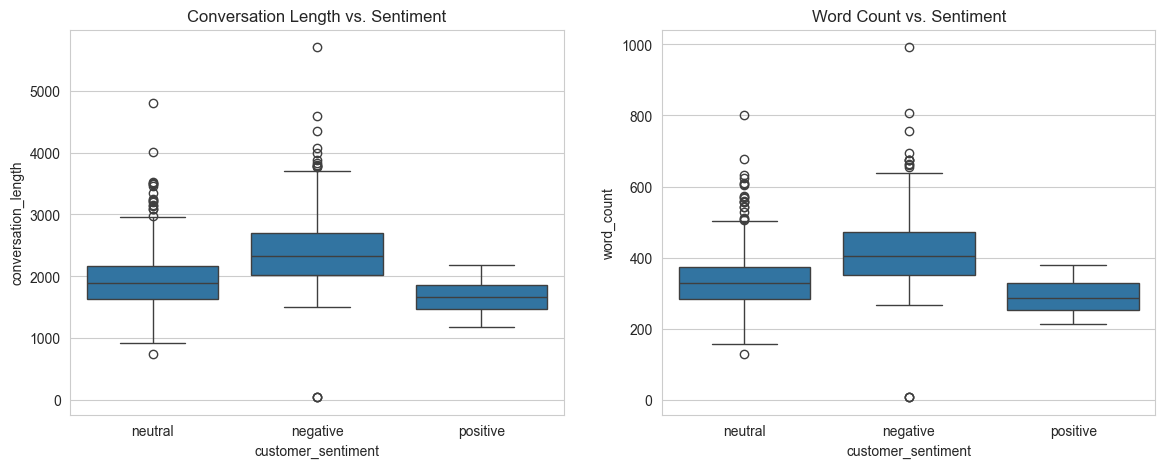

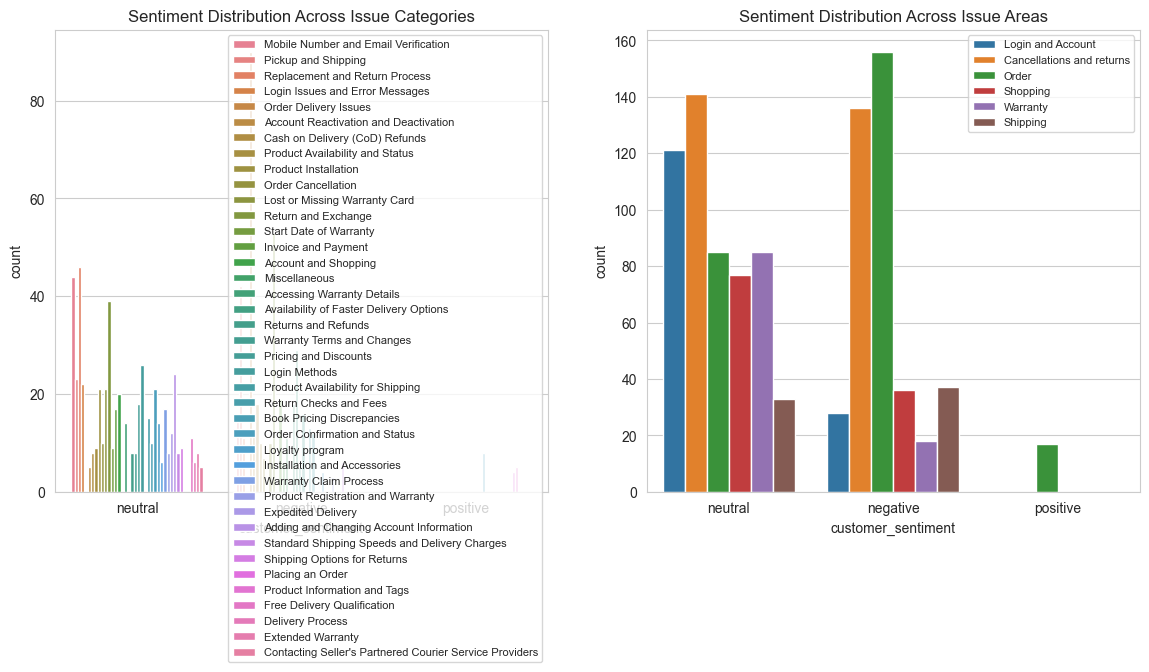

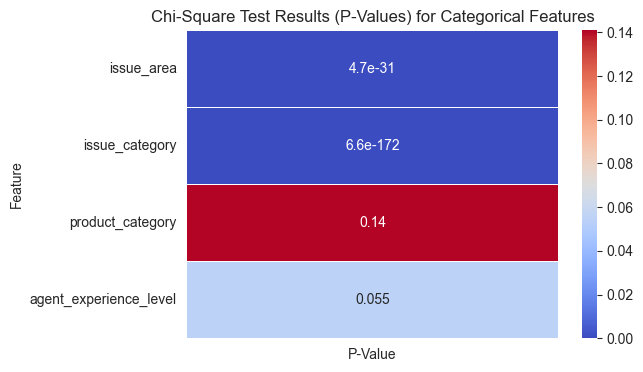

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
train_df = pd.read_csv("C:/Users/nesil.bor/Desktop/Folders/master/DI725/DI725-transformer-sentiment-analysis/data/raw/train.csv")

# Compute conversation length and word count
train_df['conversation_length'] = train_df['conversation'].astype(str).apply(len)
train_df['word_count'] = train_df['conversation'].astype(str).apply(lambda x: len(x.split()))

# Set style for better visuals
sns.set_style("whitegrid")

# 1. Boxplots for Numerical Features vs. Sentiment
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Conversation Length vs Sentiment
sns.boxplot(x='customer_sentiment', y='conversation_length', data=train_df, ax=axes[0])
axes[0].set_title('Conversation Length vs. Sentiment')

# Word Count vs Sentiment
sns.boxplot(x='customer_sentiment', y='word_count', data=train_df, ax=axes[1])
axes[1].set_title('Word Count vs. Sentiment')

plt.show()

# 2. Bar plots for Categorical Features vs. Sentiment
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Issue Category vs Sentiment
sns.countplot(x='customer_sentiment', hue='issue_category', data=train_df, ax=axes[0])
axes[0].set_title('Sentiment Distribution Across Issue Categories')
axes[0].legend(loc='upper right', fontsize=8)

# Issue Area vs Sentiment
sns.countplot(x='customer_sentiment', hue='issue_area', data=train_df, ax=axes[1])
axes[1].set_title('Sentiment Distribution Across Issue Areas')
axes[1].legend(loc='upper right', fontsize=8)

plt.show()

# 3. Heatmap for Categorical Features vs Sentiment (Chi-Square results)
import numpy as np
from scipy.stats import chi2_contingency

# Select categorical features
cat_features = ['issue_area', 'issue_category', 'product_category', 'agent_experience_level']
p_values = {}

# Compute p-values for each categorical feature
for feature in cat_features:
    contingency_table = pd.crosstab(train_df[feature], train_df['customer_sentiment'])
    chi2_p_value = chi2_contingency(contingency_table)[1]
    p_values[feature] = chi2_p_value

# Convert p-values to DataFrame for heatmap
p_values_df = pd.DataFrame(p_values.items(), columns=['Feature', 'P-Value'])
p_values_df.set_index('Feature', inplace=True)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(p_values_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Chi-Square Test Results (P-Values) for Categorical Features')
plt.show()


Analysis of Categorical Features (Chi-Square Results)
Issue Area (p ≈ 4.70e-31) and Issue Category (p ≈ 6.59e-172) show extremely low p-values (< 0.05).
This suggests that customer sentiment strongly depends on the type of issue being reported.
Product Category (p ≈ 0.14) and Agent Experience Level (p ≈ 0.05) have higher p-values (> 0.05), meaning no strong correlation with sentiment.

Sentiment varies significantly with both features. Longer conversations and higher word counts tend to correlate with certain sentiment types. Strong correlation with sentiment.
Certain issues are more frequently linked to specific sentiments.


Numerical Features:
Strong correlation between conversation_length, word_count, and customer_sentiment.
Categorical Features:
Issue-related features (issue area & category) significantly impact sentiment.
Product category & agent experience level have weak or no correlation with sentiment.